## Data Collection

###### Import Libraries

In [1]:
import pandas as pd

import numpy as np

import collections
from collections import Counter #keeps track of how many times equivalent values are added

import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set() #It gives your charts a seaborn background by default

import warnings
warnings.filterwarnings('ignore')

import math

###### Load Data

In [2]:
# Read csv files

#Plant_1_Generation_Data
P1GD = pd.read_csv('Plant_1_Generation_Data.csv') #pd.read_csv returns a new DataFrame with the data and labels from file

#Plant_1_Weather_Sensor_Data
P1WSD = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

#Plant_2_Generation_Data
P2GD = pd.read_csv('Plant_2_Generation_Data.csv')

#Plant_2_Weather_Sensor_Data
P2WSD = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')



# Data from https://www.kaggle.com/anikannal/solar-power-generation-data/discussion/179817#1021614

# Preview the first 5 lines of the loaded data 
for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.head(), "\n")
    print("_"*80, "\n")

  DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0  15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0,0,0...                     
1  15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0,0,0...                     
2  15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0,0,0...                     
3  15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0,0,0...                     
4  15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0,0,0...                      

________________________________________________________________________________ 

  DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0  2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0,...                     
1  2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0,...                     
2  2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0,...                     
3  2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0,...                     
4  2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0,...                      

_________________________

Our DataFrames have a simgle column. CSV files will need to be reread and columns split.

In [3]:
# Reread csv file and split DataFrame columns, keeping column names

#Plant_1_Generation_Data
P1GD = pd.read_csv('Plant_1_Generation_Data.csv', sep=",", quoting=3)
P1GD.columns = P1GD.columns.str.strip('" ')
P1GD.iloc[:, [0, -1]] = P1GD.iloc[:, [0, -1]].apply(lambda x: x.str.strip('"'))

# str.strip = Remove leading and trailing characters in Series/Index.
# iloc = Purely integer-location based indexing for selection by position.

#Plant_1_Weather_Sensor_Data
P1WSD = pd.read_csv('Plant_1_Weather_Sensor_Data.csv', sep=",", quoting=3)
P1WSD.columns = P1WSD.columns.str.strip('" ')
P1WSD.iloc[:, [0, -1]] = P1WSD.iloc[:, [0, -1]].apply(lambda x: x.str.strip('"'))

#Plant_2_Generation_Data
P2GD = pd.read_csv('Plant_2_Generation_Data.csv', sep=",", quoting=3)
P2GD.columns = P2GD.columns.str.strip('" ')
P2GD.iloc[:, [0, -1]] = P2GD.iloc[:, [0, -1]].apply(lambda x: x.str.strip('"'))

#Plant_2_Weather_Sensor_Data
P2WSD = pd.read_csv('Plant_2_Weather_Sensor_Data.csv', sep=",", quoting=3)
P2WSD.columns = P2WSD.columns.str.strip('" ')
P2WSD.iloc[:, [0, -1]] = P2WSD.iloc[:, [0, -1]].apply(lambda x: x.str.strip('"'))


#'GD' = generation data
#'WSD' = weather sensor data

In [4]:
#Verify column splits on DataFrames

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.shape, "\n")

(68778, 7) 

(67698, 7) 

(3182, 6) 

(3259, 6) 



## Data Definition

DATE_TIME - Date and time for each observation. Observations recorded at 15 minute intervals.

PLANT_ID- Plant ID - this will be common for the entire file.

SOURCE_KEY - Source key in this file stands for the inverter id or sensor panel id.

DC_POWER - Amount of DC power generated by the inverter (source_key) in this 15 minute intervals. Units - kW.

AC_POWER - Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

DAILY_YIELD- Daily yield is a cumulative sum of power generated on that day, till that point in time.

TOTAL_YIELD- This is the total yield for the inverter till that point in time.

AMBIENT_TEMPERATURE- This is the ambient temperature at the plant.

MODULE_TEMPERATURE- There's a module (solar panel) attached to the sensor panel. This is the Celsius temperature reading for that module.

IRRADIATION- Amount of irradiation for the 15 minute interval.

Goals of analysis: 

- Can we predict the power generation for next couple of days? - this allows for better grid management
- Can we identify the need for panel cleaning/maintenance?
- Can we identify faulty or suboptimally performing equipment?

In [5]:
# identify data type for each column

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.info(), "\n")
    print("*"*80, "\n")
    #print(df.value_counts(normalize=True)) #returns the relative frequency by dividing all values by the sum of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.7+ MB
None 

******************************************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4

GD has 7 features while WSD has 6 features. The number of entries per feature across datasets is not the same. There was no return of null values but clearly shape varies.

In [6]:
## Quick look over sample values for each feature

P1GD.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
5369,17-05-2020 16:45,4135001,YxYtjZvoooNbGkE,3646.500,358.2250,7298.000,7200030
19966,25-05-2020 08:45,4135001,ZnxXDlPa8U1GXgE,7588.875,742.9500,805.125,6596561.125
52019,10-06-2020 01:00,4135001,VHMLBKoKgIrUVDU,0.000,0.0000,0.000,7402816
44058,06-06-2020 05:45,4135001,pkci93gMrogZuBj,0.000,0.0000,0.000,7331487
33162,01-06-2020 00:30,4135001,WRmjgnKYAwPKWDb,0.000,0.0000,0.000,7153866
15262,23-05-2020 01:00,4135001,McdE0feGgRqW7Ca,0.000,0.0000,0.000,7215952
4396,17-05-2020 05:45,4135001,3PZuoBAID5Wc2HD,0.000,0.0000,0.000,7000689
38618,03-06-2020 15:00,4135001,McdE0feGgRqW7Ca,12150.125,1185.6625,6534.125,7306893.125
23160,26-05-2020 21:30,4135001,ZnxXDlPa8U1GXgE,0.000,0.0000,0.000,6612649
5149,17-05-2020 14:15,4135001,YxYtjZvoooNbGkE,5402.000,529.6875,5763.125,7198495.125


In [7]:
P1WSD.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2371,2020-06-09 13:15:00,4135001,HmiyD2TTLFNqkNe,31.378440,59.807175,0.8512261735714286
1359,2020-05-30 00:00:00,4135001,HmiyD2TTLFNqkNe,21.527159,20.860124,0
1453,2020-05-30 23:30:00,4135001,HmiyD2TTLFNqkNe,23.308522,21.465434,0
1612,2020-06-01 15:15:00,4135001,HmiyD2TTLFNqkNe,26.798169,30.744077,0.12744558120000002
1297,2020-05-29 08:30:00,4135001,HmiyD2TTLFNqkNe,23.664073,35.258107,0.359172322
2612,2020-06-12 01:30:00,4135001,HmiyD2TTLFNqkNe,22.480475,20.490389,0
550,2020-05-21 08:00:00,4135001,HmiyD2TTLFNqkNe,23.968256,33.119169,0.3646781813333333
2610,2020-06-12 01:00:00,4135001,HmiyD2TTLFNqkNe,22.602435,20.842171,0
1992,2020-06-05 14:30:00,4135001,HmiyD2TTLFNqkNe,29.279667,49.609902,0.85468980133333339
1309,2020-05-29 11:30:00,4135001,HmiyD2TTLFNqkNe,29.170437,54.048780,0.72566732066666662


## Data Cleaning

In [8]:
# Identify Frequency Count of unique values for each features per DataFrame

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.nunique(axis=0))
    print("_"*80, "\n")

DATE_TIME       3158
PLANT_ID           1
SOURCE_KEY        22
DC_POWER       32909
AC_POWER       32686
DAILY_YIELD    29900
TOTAL_YIELD    37267
dtype: int64
________________________________________________________________________________ 

DATE_TIME       3259
PLANT_ID           1
SOURCE_KEY        22
DC_POWER       30743
AC_POWER       30721
DAILY_YIELD    30345
TOTAL_YIELD    33118
dtype: int64
________________________________________________________________________________ 

DATE_TIME              3182
PLANT_ID                  1
SOURCE_KEY                1
AMBIENT_TEMPERATURE    3182
MODULE_TEMPERATURE     3182
IRRADIATION            1758
dtype: int64
________________________________________________________________________________ 

DATE_TIME              3259
PLANT_ID                  1
SOURCE_KEY                1
AMBIENT_TEMPERATURE    3259
MODULE_TEMPERATURE     3259
IRRADIATION            1863
dtype: int64
_____________________________________________________________________

In [9]:
for df in [P1GD, P2GD]:
    print(df.DC_POWER.value_counts(dropna=False))  #explicitly pass dropna=False to the function to make it return the missing value as well.

0.000000       31951
66.000000          7
78.857143          5
1842.000000        5
376.000000         5
               ...  
6849.571429        1
6878.428571        1
3267.750000        1
9513.000000        1
1186.714286        1
Name: DC_POWER, Length: 32909, dtype: int64
0.000000      35662
0.520000          7
0.526667          5
1.260000          4
1.240000          4
              ...  
153.680000        1
60.786667         1
952.420000        1
826.420000        1
533.550000        1
Name: DC_POWER, Length: 30743, dtype: int64


In [10]:
# Carryout Descriptive Statistics Summary for each features per dataset - high-level understanding

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    #print(df.describe())
    
    pd.options.display.float_format = '{:.5f}'.format
#Assign display.float_format with pandas option to change float format and suppresses scientific notation
    
    print(df.describe())
    

           PLANT_ID    DC_POWER    AC_POWER  DAILY_YIELD
count   68778.00000 68778.00000 68778.00000  68778.00000
mean  4135001.00000  3147.42621   307.80275   3295.96874
std         0.00000  4036.45717   394.39644   3145.17831
min   4135001.00000     0.00000     0.00000      0.00000
25%   4135001.00000     0.00000     0.00000      0.00000
50%   4135001.00000   429.00000    41.49375   2658.71429
75%   4135001.00000  6366.96429   623.61875   6274.00000
max   4135001.00000 14471.12500  1410.95000   9163.00000
           PLANT_ID    DC_POWER    AC_POWER  DAILY_YIELD
count   67698.00000 67698.00000 67698.00000  67698.00000
mean  4136001.00000   246.70196   241.27783   3294.89030
std         0.00000   370.56960   362.11212   2919.44839
min   4136001.00000     0.00000     0.00000      0.00000
25%   4136001.00000     0.00000     0.00000    272.75000
50%   4136001.00000     0.00000     0.00000   2911.00000
75%   4136001.00000   446.59167   438.21500   5534.00000
max   4136001.00000  1420.93333

Insights:

Each Plant has 22 inverters but DATE_TIME does not match. Ideally there would be the same number of individual observations and shape would be the same for true comparison and prediction.

DATE_TIME, SOURCE_KEY, TOTAL_YIELD, and IRRADIATION are currently objetcs. SOURCE_KEY will remain an object since it includes text. DATE_TIME will be converted to datetime64. TOTAL_YIELD and IRRADIATION will be converted to float64. We will want to parse DATE_TIME to DATE and TIME FEATURES later.

We also want to go ahead and change SOURCE_KEY so it is unique for dataframes to make merging easier and to differenciate between Power and Weather Data Source Keys.

Power Source key = Inverter key 

Weather Data Source Key = Weather Sensor Key

We see the Ambient and Module Temperatures are Celsius. We want to covert those Fahrenheit. F = 1.8 x C + 32

There are a lot of zero values present for DC_POWER. We will look into daylight hours to see if the large quantity oz zero values is linked to failure. 

Maximum and minimum values are reasonable for variables. Plant 2 has a minimum Total Yield of "0". Is this an error? if not, Plant 2 is much newer than Plant 1. 

###### Format duplicte DataFrame column names with unique name

In [11]:
# Format Power Dataset column names with unique name - INVERTER_KEY

for df in [P1GD, P2GD]:
    df = df.rename(columns = {'SOURCE_KEY':'INVERTER_KEY'}, inplace=True)

In [12]:
# Format Weather Sensor Dataset column names with unique name - WEATHER_SENSOR_KEY

for df in [P1WSD, P2WSD]:
    df = df.rename(columns = {'SOURCE_KEY':'WEATHER_SENSOR_KEY'}, inplace=True)   

###### Converting Data to Suitable dtype

In [13]:
# Convert TOTAL_YIELD columns to floats

P1GD = P1GD.astype({"TOTAL_YIELD": float})

P2GD = P2GD.astype({"TOTAL_YIELD": float})

In [14]:
# Convert IRRADIATION columns to floats

P1WSD = P1WSD.astype({"IRRADIATION": float})

P2WSD = P2WSD.astype({"IRRADIATION": float})

In [15]:
# Conversion of DATE_TIME object type to Pandas datetime format. 

#Plant 1 Data
P1GD['DATE_TIME'] = pd.to_datetime(P1GD['DATE_TIME'], format='%d-%m-%Y %H:%M', errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN.
P1WSD['DATE_TIME'] = pd.to_datetime(P1WSD['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

#Plant 2 Data
P2GD['DATE_TIME'] = pd.to_datetime(P2GD['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
P2WSD['DATE_TIME'] = pd.to_datetime(P2WSD['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


###### Convert Module and Ambient Temperatures to Fahrenheit

In [16]:
#Convert Temperaturess to Fahrenheit

AMBIENT_TEMPERATURE_F = P1WSD['AMBIENT_TEMPERATURE'] * (1.8) + 32
P1WSD['AMBIENT_TEMPERATURE_F'] = AMBIENT_TEMPERATURE_F

MODULE_TEMPERATURE_F = P1WSD['MODULE_TEMPERATURE'] * (1.8) + 32
P1WSD['MODULE_TEMPERATURE_F'] = MODULE_TEMPERATURE_F

AMBIENT_TEMPERATURE_F = P2WSD['AMBIENT_TEMPERATURE'] * (1.8) + 32
P2WSD['AMBIENT_TEMPERATURE_F'] = AMBIENT_TEMPERATURE_F

MODULE_TEMPERATURE_F = P2WSD['MODULE_TEMPERATURE'] * (1.8) + 32
P2WSD['MODULE_TEMPERATURE_F'] = MODULE_TEMPERATURE_F


In [17]:
# Drop Celsius Temperature Columns

P1WSD = P1WSD.drop(columns=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'])
P2WSD = P2WSD.drop(columns=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'])

In [18]:
# Validate Dtype changes and Temperature conversions

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.head(), "\n")
    print("_"*80, "\n")
    print(df.dtypes, "\n")
    print("*"*80, "\n")

   DATE_TIME  PLANT_ID     INVERTER_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7   0.00000   0.00000      0.00000   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y   0.00000   0.00000      0.00000   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD   0.00000   0.00000      0.00000   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4   0.00000   0.00000      0.00000   
4 2020-05-15   4135001  McdE0feGgRqW7Ca   0.00000   0.00000      0.00000   

    TOTAL_YIELD  
0 6259559.00000  
1 6183645.00000  
2 6987759.00000  
3 7602960.00000  
4 7158964.00000   

________________________________________________________________________________ 

DATE_TIME       datetime64[ns]
PLANT_ID                 int64
INVERTER_KEY            object
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
TOTAL_YIELD            float64
dtype: object 

******************************************************************************** 

   DATE_TIME  PLANT_ID     INVERTE

In [19]:
# Identify Unique INVERTER_KEYs by Plant

UI_P1GD = np.unique(P1GD['INVERTER_KEY'])
UI_P2GD = np.unique(P2GD['INVERTER_KEY'])
print('Plant 1 has ' + str(len(UI_P1GD)) + ' inverters.')
print('Plant 2 has ' + str(len(UI_P2GD)) + ' inverters.')

Plant 1 has 22 inverters.
Plant 2 has 22 inverters.


In [20]:
# Remove Redundant Features

for df in [P1WSD, P2WSD]:    
    df.drop(columns=['PLANT_ID'], axis=1, inplace=True)

###### Identify missing and NA data

In [21]:
# identify non-null values

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.notnull().sum(), "\n")
    print("*"*80, "\n")

DATE_TIME       68778
PLANT_ID        68778
INVERTER_KEY    68778
DC_POWER        68778
AC_POWER        68778
DAILY_YIELD     68778
TOTAL_YIELD     68778
dtype: int64 

******************************************************************************** 

DATE_TIME       67698
PLANT_ID        67698
INVERTER_KEY    67698
DC_POWER        67698
AC_POWER        67698
DAILY_YIELD     67698
TOTAL_YIELD     67698
dtype: int64 

******************************************************************************** 

DATE_TIME                3182
WEATHER_SENSOR_KEY       3182
IRRADIATION              3182
AMBIENT_TEMPERATURE_F    3182
MODULE_TEMPERATURE_F     3182
dtype: int64 

******************************************************************************** 

DATE_TIME                3259
WEATHER_SENSOR_KEY       3259
IRRADIATION              3259
AMBIENT_TEMPERATURE_F    3259
MODULE_TEMPERATURE_F     3259
dtype: int64 

******************************************************************************** 



In [22]:
#Calculate the difference between entries of similar dataframe at each plant
print('There is a difference of ' + str(len(P1GD) - len(P2GD)) + ' rows between P1 and P2 Power Generation Data.')
print('There is a difference of ' + str(len(P1WSD) - len(P2WSD))+ ' rows between P1 and P2 Weather Sensor Data.')

There is a difference of 1080 rows between P1 and P2 Power Generation Data.
There is a difference of -77 rows between P1 and P2 Weather Sensor Data.


In [23]:
# identify null values

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.isnull().sum(), "\n")
    print("*"*80, "\n")

DATE_TIME       0
PLANT_ID        0
INVERTER_KEY    0
DC_POWER        0
AC_POWER        0
DAILY_YIELD     0
TOTAL_YIELD     0
dtype: int64 

******************************************************************************** 

DATE_TIME       0
PLANT_ID        0
INVERTER_KEY    0
DC_POWER        0
AC_POWER        0
DAILY_YIELD     0
TOTAL_YIELD     0
dtype: int64 

******************************************************************************** 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
dtype: int64 

******************************************************************************** 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
dtype: int64 

******************************************************************************** 



In [24]:
# identify NA values

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.isna().sum(), "\n")
    print("*"*80, "\n")

DATE_TIME       0
PLANT_ID        0
INVERTER_KEY    0
DC_POWER        0
AC_POWER        0
DAILY_YIELD     0
TOTAL_YIELD     0
dtype: int64 

******************************************************************************** 

DATE_TIME       0
PLANT_ID        0
INVERTER_KEY    0
DC_POWER        0
AC_POWER        0
DAILY_YIELD     0
TOTAL_YIELD     0
dtype: int64 

******************************************************************************** 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
dtype: int64 

******************************************************************************** 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
dtype: int64 

******************************************************************************** 



No null or NAN values found. However, since frequency counts from Plant 1 and Plant 2 do not match we will check the Inverter counts to see if they are missing rows. We import Counter from collections to run this count.

In [25]:
# Identify Count of unique values (date-time) for each features per DataFrame

Counter(P1GD.INVERTER_KEY)

Counter({'1BY6WEcLGh8j5v7': 3154,
         '1IF53ai7Xc0U56Y': 3119,
         '3PZuoBAID5Wc2HD': 3118,
         '7JYdWkrLSPkdwr4': 3133,
         'McdE0feGgRqW7Ca': 3124,
         'VHMLBKoKgIrUVDU': 3133,
         'WRmjgnKYAwPKWDb': 3118,
         'ZnxXDlPa8U1GXgE': 3130,
         'ZoEaEvLYb1n2sOq': 3123,
         'adLQvlD726eNBSB': 3119,
         'bvBOhCH3iADSZry': 3155,
         'iCRJl6heRkivqQ3': 3125,
         'ih0vzX44oOqAx2f': 3130,
         'pkci93gMrogZuBj': 3125,
         'rGa61gmuvPhdLxV': 3124,
         'sjndEbLyjtCKgGv': 3124,
         'uHbuxQJl8lW7ozc': 3125,
         'wCURE6d3bPkepu2': 3126,
         'z9Y9gH1T5YWrNuG': 3126,
         'zBIq5rxdHJRwDNY': 3119,
         'zVJPv84UY57bAof': 3124,
         'YxYtjZvoooNbGkE': 3104})

In [26]:
Counter(P2GD.INVERTER_KEY)

Counter({'4UPUqMRk7TRMgml': 3195,
         '81aHJ1q11NBPMrL': 3259,
         '9kRcWv60rDACzjR': 3259,
         'Et9kgGMDl729KT4': 3195,
         'IQ2d7wF4YD8zU1Q': 2355,
         'LYwnQax7tkwH5Cb': 3259,
         'LlT2YUhhzqhg5Sw': 3259,
         'Mx2yZCDsyf6DPfv': 3195,
         'NgDl19wMapZy17u': 2355,
         'PeE6FRyGXUgsRhN': 3259,
         'Qf4GUc1pJu5T6c6': 3195,
         'Quc1TzYxW2pYoWX': 3195,
         'V94E5Ben1TlhnDV': 3259,
         'WcxssY2VbP4hApt': 3259,
         'mqwcsP2rE7J0TFp': 2355,
         'oZ35aAeoifZaQzV': 3195,
         'oZZkBaNadn6DNKz': 3259,
         'q49J1IKaHRwDQnt': 3259,
         'rrq4fwE8jgrTyWY': 3259,
         'vOuJvMaM2sgwLmb': 3259,
         'xMbIugepa2P7lBB': 2355,
         'xoJJ8DcxJEcupym': 3259})

In [27]:
Counter(P1WSD.WEATHER_SENSOR_KEY)

Counter({'HmiyD2TTLFNqkNe': 3182})

In [28]:
Counter(P2WSD.WEATHER_SENSOR_KEY)

Counter({'iq8k7ZNt4Mwm3w0': 3259})

bvBOhCH3iADSZry has the highest Plant 1 data rowcount with 3155 while YxYtjZvoooNbGkE has the lowest 3104.

Multiple inverters at Plant 2 have 3259 data rows, which matches the Weather sensor row count.

Rows per inverter do not match. We will consider inserting rows for missing DATE_TIME to be filled with NA.

We will look to insert rows for missing datetimes across all dfs so all inverters and sensors have readings for the same datetimes. After row insertion we would imput values. We need to decide if we will input values for NA or drop observations with NA. 

In [29]:
# Identify Unique DATE_TIME by Plant

UD_P1GD = np.unique(P1GD['DATE_TIME'])
UD_P2GD = np.unique(P2GD['DATE_TIME'])

UD_P1WSD = np.unique(P1WSD['DATE_TIME'])
UD_P2WSD = np.unique(P2WSD['DATE_TIME'])

print('Plant 1 has ' + str(len(UD_P1GD)) + ' unique DATE_TIME observations for POWER DATA.')
print('Plant 2 has ' + str(len(UD_P2GD)) + ' unique DATE_TIME observations for POWER DATA.')

print('Plant 1 has ' + str(len(UD_P1WSD)) + ' unique DATE_TIME observations for WEATHER SENSOR DATA.')
print('Plant 2 has ' + str(len(UD_P2WSD)) + ' unique DATE_TIME observations for WEATHER SENSOR DATA.')

print("_"*80, "\n")
print('Plant 1 has ' + str(len(UD_P1GD) - len(UD_P1WSD)) + ' variance of DATE_TIME observations between POWER and  WEATHER SENSOR DATA.')
print('Plant 2 has ' + str(len(UD_P2GD) - len(UD_P2WSD)) + ' variance of DATE_TIME observations between POWER and  WEATHER SENSOR DATA.')


Plant 1 has 3158 unique DATE_TIME observations for POWER DATA.
Plant 2 has 3259 unique DATE_TIME observations for POWER DATA.
Plant 1 has 3182 unique DATE_TIME observations for WEATHER SENSOR DATA.
Plant 2 has 3259 unique DATE_TIME observations for WEATHER SENSOR DATA.
________________________________________________________________________________ 

Plant 1 has -24 variance of DATE_TIME observations between POWER and  WEATHER SENSOR DATA.
Plant 2 has 0 variance of DATE_TIME observations between POWER and  WEATHER SENSOR DATA.


###### Create merged DataFrames prior to further data cleansing

In [30]:
#Merge dfs

P1_PRE_CLEAN = pd.merge(P1WSD, P1GD, how='left', on=['DATE_TIME'])
P2_PRE_CLEAN = pd.merge(P2WSD, P2GD, how='left', on=['DATE_TIME'])


# check merged Plant dfs for nulls and inspect the data
print(P1_PRE_CLEAN.isna().sum(), "\n")
print(P2_PRE_CLEAN.isna().sum(), "\n")

DATE_TIME                 0
WEATHER_SENSOR_KEY        0
IRRADIATION               0
AMBIENT_TEMPERATURE_F     0
MODULE_TEMPERATURE_F      0
PLANT_ID                 25
INVERTER_KEY             25
DC_POWER                 25
AC_POWER                 25
DAILY_YIELD              25
TOTAL_YIELD              25
dtype: int64 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
PLANT_ID                 0
INVERTER_KEY             0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
dtype: int64 



PLANT_ID, INVERTER_KEY, DC_POWER, AC_POWER, DAILY_YIELD, and TOTAL_YIELD from Plant 25 have null values.

In [31]:
print(P1_PRE_CLEAN.shape)
print(P2_PRE_CLEAN.shape)


(68799, 11)
(67698, 11)


In [32]:
#Calculate the difference between entries of similar dataframe at each plant
print('There is a difference of ' + str(len(P1_PRE_CLEAN) - len(P2_PRE_CLEAN)) + ' rows between P1 and P2 Data.')

There is a difference of 1101 rows between P1 and P2 Data.


In [33]:
# check dfs for nulls and inspect the data
print(P1_PRE_CLEAN.isna().sum(), "\n")
print("_"*80, "\n")
print(P2_PRE_CLEAN.isna().sum(), "\n")


DATE_TIME                 0
WEATHER_SENSOR_KEY        0
IRRADIATION               0
AMBIENT_TEMPERATURE_F     0
MODULE_TEMPERATURE_F      0
PLANT_ID                 25
INVERTER_KEY             25
DC_POWER                 25
AC_POWER                 25
DAILY_YIELD              25
TOTAL_YIELD              25
dtype: int64 

________________________________________________________________________________ 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
PLANT_ID                 0
INVERTER_KEY             0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
dtype: int64 



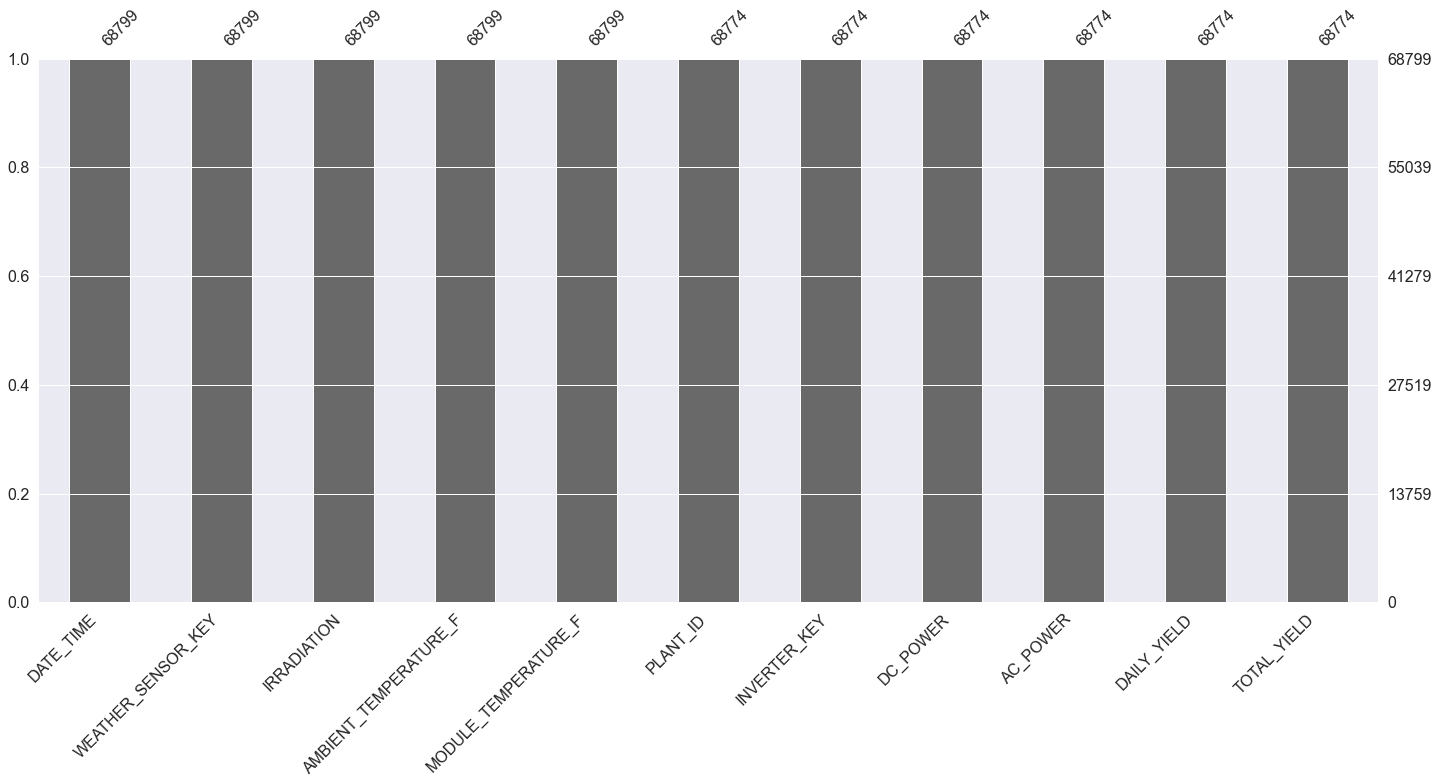

In [34]:
# generate preview of entries with null values for PLANT 1

if len(P1_PRE_CLEAN[P1_PRE_CLEAN.isnull().any(axis=1)] != 0): #is not equal to
    #print(P1_PRE_CLEAN[P1_PRE_CLEAN.isnull().any(axis=1)].head(40))
    
# Visualize missing values (NaN) values using Missingno Library    
    msno.bar(P1_PRE_CLEAN)
    plt.show()

Weather Sensor Key HmiyD2TTLFNqkNe (Plant 1) has 25 NAN values for PLANT_ID, INVERTER_KEY, DC_POWER  AC_POWER  DAILY_YIELD and TOTAL_YIELD

No missing values in plant 2 data

In [35]:
p2_MV = P1_PRE_CLEAN.copy()
p1_MV = P2_PRE_CLEAN.copy()

In [36]:
# Establish sunrise/sunset timeframes.

P1_CLEAN_DAYTIME = p1_MV[p1_MV['IRRADIATION']>= 0.01].groupby('DATE_TIME')['INVERTER_KEY'].count().reset_index()
P1_CLEAN_DAYTIME['DATE_TIME'] = P1_CLEAN_DAYTIME['DATE_TIME'].dt.time

P2_CLEAN_DAYTIME = p2_MV[p2_MV['IRRADIATION']>= 0.01].groupby('DATE_TIME')['INVERTER_KEY'].count().reset_index()
P2_CLEAN_DAYTIME['DATE_TIME'] = P2_CLEAN_DAYTIME['DATE_TIME'].dt.time

print("Plant 1 Daytime Hours \n", P2_CLEAN_DAYTIME.groupby('DATE_TIME')['INVERTER_KEY'].count(), "\n")
print("Plant 2 Daytime Hours \n", P2_CLEAN_DAYTIME.groupby('DATE_TIME')['INVERTER_KEY'].count(), "\n")

Plant 1 Daytime Hours 
 DATE_TIME
06:00:00     7
06:15:00    31
06:30:00    32
06:45:00    33
07:00:00    33
07:15:00    33
07:30:00    33
07:45:00    34
08:00:00    34
08:15:00    34
08:30:00    34
08:45:00    34
09:00:00    34
09:15:00    34
09:30:00    34
09:45:00    34
10:00:00    34
10:15:00    34
10:30:00    34
10:45:00    34
11:00:00    34
11:15:00    34
11:30:00    34
11:45:00    33
12:00:00    33
12:15:00    33
12:30:00    34
12:45:00    34
13:00:00    34
13:15:00    34
13:30:00    33
13:45:00    33
14:00:00    32
14:15:00    33
14:30:00    33
14:45:00    33
15:00:00    33
15:15:00    33
15:30:00    33
15:45:00    33
16:00:00    33
16:15:00    33
16:30:00    33
16:45:00    33
17:00:00    33
17:15:00    33
17:30:00    34
17:45:00    34
18:00:00    33
18:15:00    27
18:30:00     2
Name: INVERTER_KEY, dtype: int64 

Plant 2 Daytime Hours 
 DATE_TIME
06:00:00     7
06:15:00    31
06:30:00    32
06:45:00    33
07:00:00    33
07:15:00    33
07:30:00    33
07:45:00    34
08:00:00    

Irradiation is >= 0.01 between 06:00:00 (6:00am) and 18:30:00 (6:30pm) for both plants. Since Solar DC Power Generation is dependent upon Irradiation, this is a good indicator of daytime vs nighttime hours.

###### Handling missing and NA data

In [37]:
#Create copy of DataFrames

P1_CLEAN = P1_PRE_CLEAN.copy()
P2_CLEAN = P2_PRE_CLEAN.copy()



print(P1_CLEAN.shape)
print(P2_CLEAN.shape)


(68799, 11)
(67698, 11)


We have decided to drop observations with NAN instead of filling.

In [38]:
#Drop rows where all elements are missing.
for df in [P1_CLEAN, P2_CLEAN]:
    df.dropna(inplace=True)


In [39]:
print(P1_CLEAN.shape)
print(P2_CLEAN.shape)

(68774, 11)
(67698, 11)


In [40]:
# check dfs for nulls and inspect the data
print(P1_CLEAN.isna().sum(), "\n")
print("*"*80, "\n")
print(P2_CLEAN.isna().sum(), "\n")

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
PLANT_ID                 0
INVERTER_KEY             0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
dtype: int64 

******************************************************************************** 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
PLANT_ID                 0
INVERTER_KEY             0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
dtype: int64 



###### Feature engeneering

In [41]:
# Separation of DATE_TIME to date and time as additional time features used as a helper

for df in [P1_CLEAN, P2_CLEAN]:
    df['DATE'] = df['DATE_TIME'].dt.date
    df['TIME'] = df['DATE_TIME'].dt.time
    df['HOUR'] = df['DATE_TIME'].dt.hour
    df['DAY'] = df['DATE_TIME'].dt.day
    df['WEEKDAY'] = df['DATE_TIME'].dt.day_name()
    df['MONTH'] = df['DATE_TIME'].dt.month
    df['YEAR'] = df['DATE_TIME'].dt.year


In [42]:
for df in [P1_CLEAN, P2_CLEAN]:
    df['DATE'] = pd.to_datetime(df['DATE'])
    #df['DATE'] = df['DATE'].dt.strftime('%m/%d/%Y')

# Validate Dtype changes
    print(df.DATE.head(), "\n")

0   2020-05-15
1   2020-05-15
2   2020-05-15
3   2020-05-15
4   2020-05-15
Name: DATE, dtype: datetime64[ns] 

0   2020-05-15
1   2020-05-15
2   2020-05-15
3   2020-05-15
4   2020-05-15
Name: DATE, dtype: datetime64[ns] 



###### Overview of DC POWER

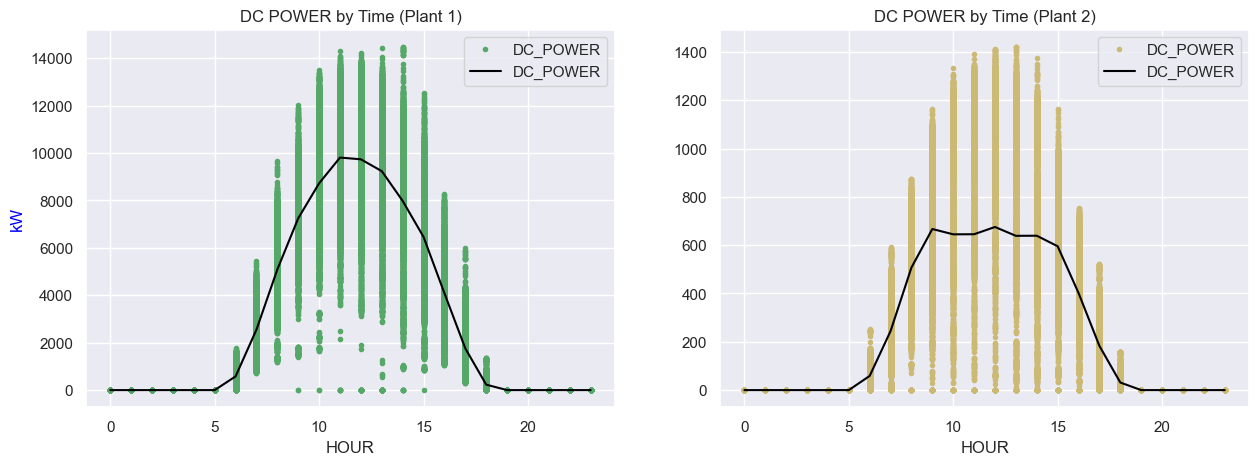

In [43]:
#Yield by time to identify features with outliers that should be negated. 

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

#Power Plant 1 DC POWER by 
P1_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='g.', figsize=(15,5),ax=ax[0])
P1_CLEAN.groupby('HOUR')['DC_POWER'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[0])

#Power Plant 2 DC POWER by Hour
P2_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='y.', figsize=(15,5),ax=ax[1])
P2_CLEAN.groupby('HOUR')['DC_POWER'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[1])

ax[0].set_title('DC POWER by Time (Plant 1)')
ax[1].set_title('DC POWER by Time (Plant 2)')
ax[0].set_ylabel('kW',color='blue',fontsize=12)
plt.show()

###### Plants generates DC Power between 06:00 and 18:15, otherwise generation should be at zero due to daylight hours.

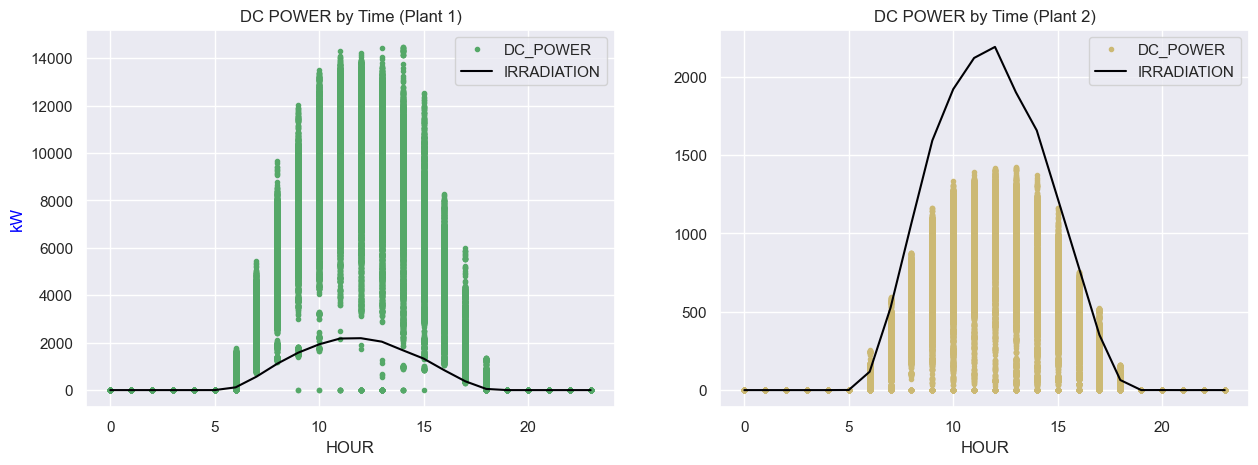

In [44]:
#Yield by time to identify features with outliers that should be negated. 

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

#Power Plant 1 DC POWER by 
P1_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='g.', figsize=(15,5),ax=ax[0])
P1_CLEAN.groupby('HOUR')['IRRADIATION'].agg('sum').plot(legend=True, colormap='inferno',ax=ax[0])

#Power Plant 2 DC POWER by Hour
P2_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='y.', figsize=(15,5),ax=ax[1])
P2_CLEAN.groupby('HOUR')['IRRADIATION'].agg('sum').plot(legend=True, colormap='inferno',ax=ax[1])

ax[0].set_title('DC POWER by Time (Plant 1)')
ax[1].set_title('DC POWER by Time (Plant 2)')
ax[0].set_ylabel('kW',color='blue',fontsize=12)
plt.show()

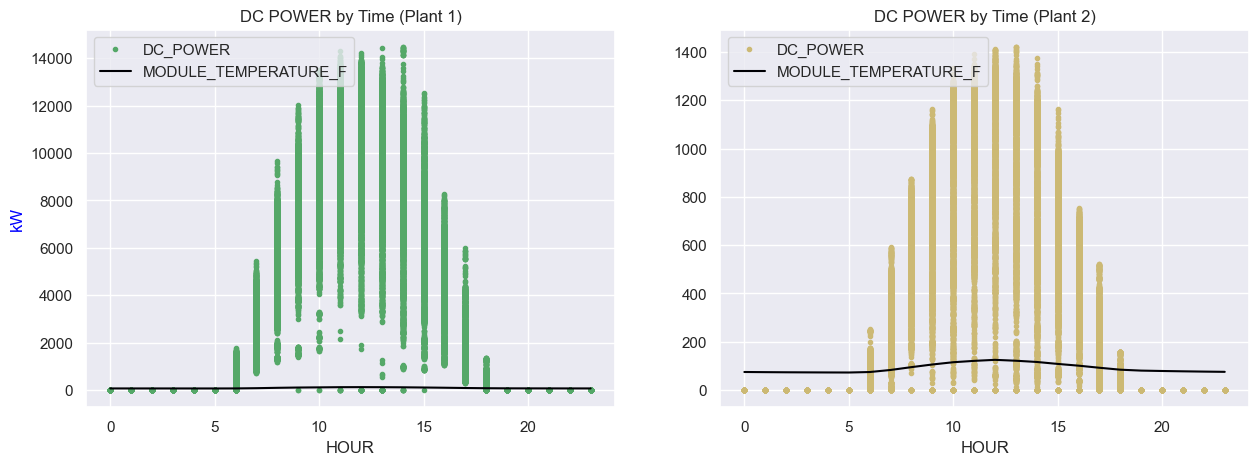

In [45]:
#Yield by time to identify features with outliers that should be negated. 

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

#Power Plant 1 DC POWER by 
P1_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='g.', figsize=(15,5),ax=ax[0])
P1_CLEAN.groupby('HOUR')['MODULE_TEMPERATURE_F'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[0])

#Power Plant 2 DC POWER by Hour
P2_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='y.', figsize=(15,5),ax=ax[1])
P2_CLEAN.groupby('HOUR')['MODULE_TEMPERATURE_F'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[1])

ax[0].set_title('DC POWER by Time (Plant 1)')
ax[1].set_title('DC POWER by Time (Plant 2)')
ax[0].set_ylabel('kW',color='blue',fontsize=12)
plt.show()

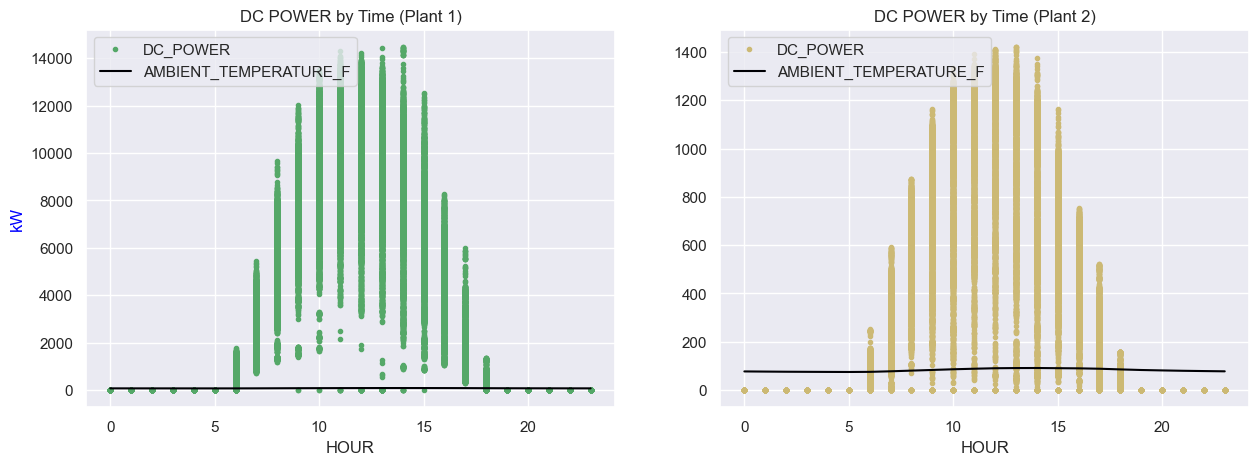

In [46]:
#Yield by time to identify features with outliers that should be negated. 

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

#Power Plant 1 DC POWER by 
P1_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='g.', figsize=(15,5),ax=ax[0])
P1_CLEAN.groupby('HOUR')['AMBIENT_TEMPERATURE_F'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[0])

#Power Plant 2 DC POWER by Hour
P2_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='y.', figsize=(15,5),ax=ax[1])
P2_CLEAN.groupby('HOUR')['AMBIENT_TEMPERATURE_F'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[1])

ax[0].set_title('DC POWER by Time (Plant 1)')
ax[1].set_title('DC POWER by Time (Plant 2)')
ax[0].set_ylabel('kW',color='blue',fontsize=12)
plt.show()

In [47]:
# Inverter level analysis

In [48]:
P1_INVETER = P1_CLEAN.copy()
P2_INVETER = P2_CLEAN.copy()

In [49]:
P1_INVETER.dtypes

DATE_TIME                datetime64[ns]
WEATHER_SENSOR_KEY               object
IRRADIATION                     float64
AMBIENT_TEMPERATURE_F           float64
MODULE_TEMPERATURE_F            float64
PLANT_ID                        float64
INVERTER_KEY                     object
DC_POWER                        float64
AC_POWER                        float64
DAILY_YIELD                     float64
TOTAL_YIELD                     float64
DATE                     datetime64[ns]
TIME                             object
HOUR                              int64
DAY                               int64
WEEKDAY                          object
MONTH                             int64
YEAR                              int64
dtype: object

In [50]:
#Create Dummy Variables for DC Power and Daytime Hours

for df in [P1_INVETER, P2_INVETER]:

    df['DC_ZERO_POWER'] = np.where(((df['DC_POWER'] >= 0.01)), 0, 1)
    df.astype({'HOUR': float})
    df['DAYTIME_HOURS'] = np.where(np.logical_and(df['HOUR'] > 6, df['HOUR'] < 18), 1, 0)
    

In [51]:
P1_INVETER.sample(10)

,DATE_TIME,WEATHER_SENSOR_KEY,IRRADIATION,AMBIENT_TEMPERATURE_F,MODULE_TEMPERATURE_F,PLANT_ID,INVERTER_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME,HOUR,DAY,WEEKDAY,MONTH,YEAR,DC_ZERO_POWER,DAYTIME_HOURS
2220,2020-05-16 05:00:00,HmiyD2TTLFNqkNe,0.00000,71.47900,69.22807,4135001.00000,McdE0feGgRqW7Ca,0.00000,0.00000,0.00000,7165435.00000,2020-05-16,05:00:00,5,16,Saturday,5,2020,1,0
64325,2020-06-15 20:30:00,HmiyD2TTLFNqkNe,0.00000,74.08323,71.82982,4135001.00000,sjndEbLyjtCKgGv,0.00000,0.00000,6728.00000,7249539.00000,2020-06-15,20:30:00,20,15,Monday,6,2020,1,0
33886,2020-06-01 08:30:00,HmiyD2TTLFNqkNe,0.42221,78.45189,105.15894,4135001.00000,7JYdWkrLSPkdwr4,5888.37500,577.10000,807.25000,7728628.25000,2020-06-01,08:30:00,8,1,Monday,6,2020,0,1
28946,2020-05-30 00:15:00,HmiyD2TTLFNqkNe,0.00000,70.68705,69.25831,4135001.00000,YxYtjZvoooNbGkE,0.00000,0.00000,0.00000,7292503.00000,2020-05-30,00:15:00,0,30,Saturday,5,2020,1,0
39604,2020-06-04 02:00:00,HmiyD2TTLFNqkNe,0.00000,73.38268,71.49487,4135001.00000,7JYdWkrLSPkdwr4,0.00000,0.00000,0.00000,7748622.00000,2020-06-04,02:00:00,2,4,Thursday,6,2020,1,0
23845,2020-05-27 05:15:00,HmiyD2TTLFNqkNe,0.00000,74.22259,70.83920,4135001.00000,3PZuoBAID5Wc2HD,0.00000,0.00000,0.00000,7078711.00000,2020-05-27,05:15:00,5,27,Wednesday,5,2020,1,0
44165,2020-06-06 06:45:00,HmiyD2TTLFNqkNe,0.10837,71.18160,69.88140,4135001.00000,pkci93gMrogZuBj,1329.28571,129.61429,43.85714,7331530.85700,2020-06-06,06:45:00,6,6,Saturday,6,2020,0,0
57263,2020-06-12 12:15:00,HmiyD2TTLFNqkNe,0.50727,80.71005,113.94314,4135001.00000,sjndEbLyjtCKgGv,7383.62500,722.95000,2841.87500,7224095.87500,2020-06-12,12:15:00,12,12,Friday,6,2020,0,1
15056,2020-05-22 22:30:00,HmiyD2TTLFNqkNe,0.00000,74.38497,72.76789,4135001.00000,bvBOhCH3iADSZry,0.00000,0.00000,6760.00000,6368908.00000,2020-05-22,22:30:00,22,22,Friday,5,2020,1,0
34339,2020-06-01 13:30:00,HmiyD2TTLFNqkNe,0.66736,82.03468,97.91849,4135001.00000,sjndEbLyjtCKgGv,8334.87500,815.17500,4644.62500,7146886.62500,2020-06-01,13:30:00,13,1,Monday,6,2020,0,1


In [52]:
#Create Dummy Variables for Zero DC During daylight hours --- Inverter Failure

for df in [P1_INVETER, P2_INVETER]:

    df['INVERTER_FAILURE'] = np.where((df['DC_ZERO_POWER'] == 1) & (df['DAYTIME_HOURS'] == 1), 1, 0)

In [53]:
for df in [P1_INVETER, P2_INVETER]:
    print(df.INVERTER_FAILURE.value_counts(dropna=False))

0    68711
1       63
Name: INVERTER_FAILURE, dtype: int64
0    63864
1     3834
Name: INVERTER_FAILURE, dtype: int64


In [57]:
P1_INVETER.sample(50)

,DATE_TIME,WEATHER_SENSOR_KEY,IRRADIATION,AMBIENT_TEMPERATURE_F,MODULE_TEMPERATURE_F,PLANT_ID,INVERTER_KEY,DC_POWER,AC_POWER,DAILY_YIELD,...,DATE,TIME,HOUR,DAY,WEEKDAY,MONTH,YEAR,DC_ZERO_POWER,DAYTIME_HOURS,INVERTER_FAILURE
10669,2020-05-20 06:15:00,HmiyD2TTLFNqkNe,0.03211,71.07791,67.16714,4135001.00000,uHbuxQJl8lW7ozc,436.62500,42.22500,6.87500,...,2020-05-20,06:15:00,6,20,Wednesday,5,2020,0,0,0
32112,2020-05-31 12:15:00,HmiyD2TTLFNqkNe,0.66136,84.60215,124.26979,4135001.00000,VHMLBKoKgIrUVDU,8359.12500,817.18750,3498.50000,...,2020-05-31,12:15:00,12,31,Sunday,5,2020,0,1,0
44114,2020-06-06 06:15:00,HmiyD2TTLFNqkNe,0.03188,69.84692,66.50295,4135001.00000,YxYtjZvoooNbGkE,421.14286,40.71429,8.71429,...,2020-06-06,06:15:00,6,6,Saturday,6,2020,0,0,0
43069,2020-06-05 18:00:00,HmiyD2TTLFNqkNe,0.09595,81.81705,87.15812,4135001.00000,ZnxXDlPa8U1GXgE,1181.00000,115.01429,7610.00000,...,2020-06-05,18:00:00,18,5,Friday,6,2020,0,0,0
67309,2020-06-17 07:00:00,HmiyD2TTLFNqkNe,0.09332,72.46873,75.69863,4135001.00000,WRmjgnKYAwPKWDb,1371.62500,133.86250,17.50000,...,2020-06-17,07:00:00,7,17,Wednesday,6,2020,0,1,0
65216,2020-06-16 06:45:00,HmiyD2TTLFNqkNe,0.07061,73.33013,75.05859,4135001.00000,VHMLBKoKgIrUVDU,1026.00000,99.71429,32.85714,...,2020-06-16,06:45:00,6,16,Tuesday,6,2020,0,0,0
66487,2020-06-16 21:15:00,HmiyD2TTLFNqkNe,0.00000,74.26162,71.19435,4135001.00000,1BY6WEcLGh8j5v7,0.00000,0.00000,5848.00000,...,2020-06-16,21:15:00,21,16,Tuesday,6,2020,1,0,0
14104,2020-05-22 10:45:00,HmiyD2TTLFNqkNe,0.70915,82.52508,108.94711,4135001.00000,ZoEaEvLYb1n2sOq,9018.00000,881.06250,1941.62500,...,2020-05-22,10:45:00,10,22,Friday,5,2020,0,1,0
20106,2020-05-25 10:15:00,HmiyD2TTLFNqkNe,0.83416,84.59195,128.30254,4135001.00000,YxYtjZvoooNbGkE,11016.50000,1076.58750,2182.75000,...,2020-05-25,10:15:00,10,25,Monday,5,2020,0,1,0
6581,2020-05-18 06:30:00,HmiyD2TTLFNqkNe,0.05396,70.89858,70.80880,4135001.00000,ZoEaEvLYb1n2sOq,737.28571,71.47143,18.42857,...,2020-05-18,06:30:00,6,18,Monday,5,2020,0,0,0


### Saving Files for Exploratory Data Analysis

In [55]:
#turning dataframe to CSV to use in separate notebook for Analysis and Modeling.
P1_INVETER.to_csv('P1_INVETER.csv')
P2_INVETER.to_csv('P2_INVETER.csv')